In [98]:
# Importing Libraries
import os
from operator import itemgetter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')

-- Importing tensorflow and keras:

In [99]:
import tensorflow as tf

from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

-- Importing the Embedded Layer:

In [100]:
from keras.layers import Embedding

embedd_lay = Embedding(1000, 64)
from keras.datasets import imdb
from keras import preprocessing
from keras.utils import pad_sequences

-- Developing a specialized embedding layer tailored to a dataset with 100 training samples:

In [101]:
# No. of words considered as features
features = 10000

# cutting off the text upto next 150 words
length = 150

# Loading the data:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=features)
x_train = x_train[:100]
y_train = y_train[:100]

# Preprocessing the data:
x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)
from keras.models import Sequential
from keras.layers import Flatten, Dense

# Building the model:
model1 = Sequential()
model1.add(Embedding(10000, 8, input_length=length))
model1.add(Flatten())
model1.add(Dense(1, activation='sigmoid'))

# Compiling the model:
model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model1.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 150, 8)            80000     
                                                                 
 flatten_15 (Flatten)        (None, 1200)              0         
                                                                 
 dense_25 (Dense)            (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [102]:
#Training the neural network model:
record1 = model1.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
3/3 [==============================] - 1s 229ms/step - loss: 0.6935 - acc: 0.5250 - val_loss: 0.6966 - val_acc: 0.4500
Epoch 2/10
3/3 [==============================] - 0s 44ms/step - loss: 0.6686 - acc: 0.9000 - val_loss: 0.6971 - val_acc: 0.4000
Epoch 3/10
3/3 [==============================] - 0s 27ms/step - loss: 0.6503 - acc: 0.9750 - val_loss: 0.6969 - val_acc: 0.5000
Epoch 4/10
3/3 [==============================] - 0s 36ms/step - loss: 0.6339 - acc: 1.0000 - val_loss: 0.6975 - val_acc: 0.4500
Epoch 5/10
3/3 [==============================] - 0s 39ms/step - loss: 0.6178 - acc: 1.0000 - val_loss: 0.6979 - val_acc: 0.4500
Epoch 6/10
3/3 [==============================] - 0s 35ms/step - loss: 0.6019 - acc: 1.0000 - val_loss: 0.6975 - val_acc: 0.4500
Epoch 7/10
3/3 [==============================] - 0s 35ms/step - loss: 0.5858 - acc: 1.0000 - val_loss: 0.6977 - val_acc: 0.5000
Epoch 8/10
3/3 [==============================] - 0s 27ms/step - loss: 0.5694 - acc: 1.0000 - va

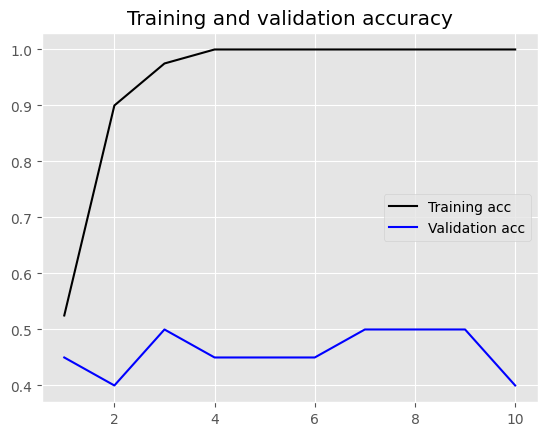

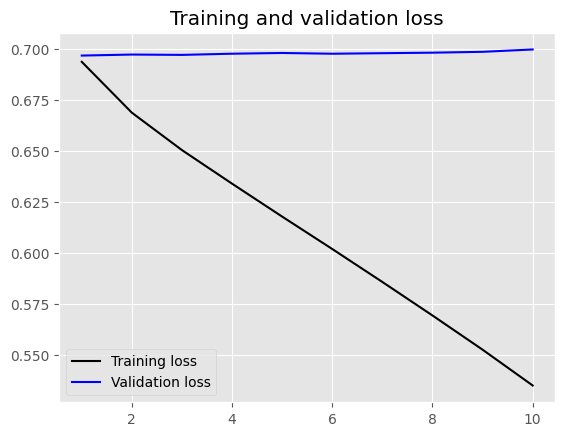

In [103]:
# Displaying accuracy and loss curves
import matplotlib.pyplot as plt

# Train accuracy
accuracy = record1.history["acc"]
# Validation accuracy
validation_accuracy = record1.history["val_acc"]
# Train loss
Train_loss = record1.history["loss"]
# Validation loss
validation_loss = record1.history["val_loss"]


epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "Black", label = "Training acc")
plt.plot(epochs, validation_accuracy, "blue", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, Train_loss, "Black", label = "Training loss")
plt.plot(epochs, validation_loss, "Blue", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [104]:
#Evaluating the training model on test data:
test_loss, test_acc = model1.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

782/782 [==============================] - 3s 3ms/step - loss: 0.6936 - acc: 0.5025
Test loss: 0.6935880184173584
Test accuracy: 0.5024799704551697


-- Developing a specialized embedding layer tailored to a dataset with 5000 training samples:

In [105]:
# No. of words considered as features
features = 10000

# Cutting off the text upto 150 words
length = 150
# Loading the data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=features)

# Preprocessing the data:
x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)

# Combining text and labels:
texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

# Reducing training data to 5000 samples:
x_train = x_train[:5000]
y_train = y_train[:5000]

# Initializing the model and adding the layers:
model2 = Sequential()
model2.add(Embedding(10000, 8, input_length=length))
model2.add(Flatten())
model2.add(Dense(1, activation='sigmoid'))

# Compiling the model
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model2.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, 150, 8)            80000     
                                                                 
 flatten_16 (Flatten)        (None, 1200)              0         
                                                                 
 dense_26 (Dense)            (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [106]:
# Training the NN model:
record2 = model2.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
125/125 [==============================] - 1s 4ms/step - loss: 0.6922 - acc: 0.5175 - val_loss: 0.6901 - val_acc: 0.5380
Epoch 2/10
125/125 [==============================] - 0s 3ms/step - loss: 0.6697 - acc: 0.7165 - val_loss: 0.6779 - val_acc: 0.6140
Epoch 3/10
125/125 [==============================] - 0s 3ms/step - loss: 0.6213 - acc: 0.8347 - val_loss: 0.6427 - val_acc: 0.7120
Epoch 4/10
125/125 [==============================] - 0s 3ms/step - loss: 0.5362 - acc: 0.8827 - val_loss: 0.5867 - val_acc: 0.7440
Epoch 5/10
125/125 [==============================] - 0s 3ms/step - loss: 0.4341 - acc: 0.8990 - val_loss: 0.5299 - val_acc: 0.7740
Epoch 6/10
125/125 [==============================] - 1s 4ms/step - loss: 0.3409 - acc: 0.9295 - val_loss: 0.4829 - val_acc: 0.7900
Epoch 7/10
125/125 [==============================] - 1s 5ms/step - loss: 0.2654 - acc: 0.9480 - val_loss: 0.4531 - val_acc: 0.7950
Epoch 8/10
125/125 [==============================] - 1s 4ms/step - loss: 0.

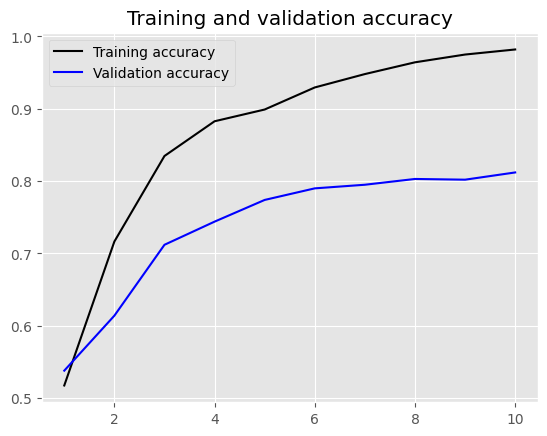

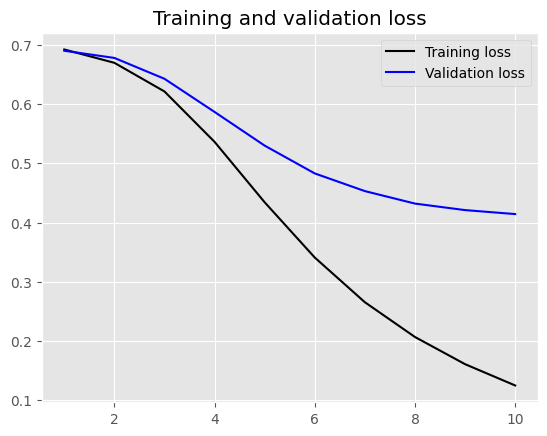

In [107]:
# Displaying the loss curves:
accuracy2 = record2.history['acc']
validation_accuracy2 = record2.history['val_acc']
Train_loss2 = record2.history['loss']
validation_loss2 = record2.history['val_loss']

epochs = range(1, len(accuracy2) + 1)

plt.plot(epochs, accuracy2, 'Black', label='Training accuracy')
plt.plot(epochs, validation_accuracy2, 'blue', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, Train_loss2, 'Black', label='Training loss')
plt.plot(epochs, validation_loss2, 'blue', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [108]:
# Evaluating training model on test data:
test_loss2, test_accuracy2 = model2.evaluate(x_test, y_test)
print('Test loss:', test_loss2)
print('Test accuracy:', test_accuracy2)

782/782 [==============================] - 1s 2ms/step - loss: 0.3944 - acc: 0.8194
Test loss: 0.394353985786438
Test accuracy: 0.8193600177764893


-- -- Developing a specialized embedding layer tailored to a dataset with 1000 training samples:

In [109]:
features = 10000 # No. of words considered as features
length = 150 # cutting off the text upto text 150 words

# Loading the data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=features)

# Padding sequences
x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)

# Combining both texts and labels
texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

# Reducing the training size to 1000 samples
x_train = x_train[:1000]
y_train = y_train[:1000]

# Initializing the model and adding the layers
model3 = Sequential()
model3.add(Embedding(10000, 8, input_length=length))
model3.add(Flatten())
model3.add(Dense(1, activation='sigmoid'))

# Compiling the model
model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model3.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_19 (Embedding)    (None, 150, 8)            80000     
                                                                 
 flatten_17 (Flatten)        (None, 1200)              0         
                                                                 
 dense_27 (Dense)            (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [110]:
# Training the NN model
history3 = model3.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
25/25 [==============================] - 1s 11ms/step - loss: 0.6943 - acc: 0.4775 - val_loss: 0.6950 - val_acc: 0.4000
Epoch 2/10
25/25 [==============================] - 0s 5ms/step - loss: 0.6779 - acc: 0.7450 - val_loss: 0.6948 - val_acc: 0.4450
Epoch 3/10
25/25 [==============================] - 0s 7ms/step - loss: 0.6615 - acc: 0.8625 - val_loss: 0.6945 - val_acc: 0.4700
Epoch 4/10
25/25 [==============================] - 0s 8ms/step - loss: 0.6409 - acc: 0.9287 - val_loss: 0.6940 - val_acc: 0.4600
Epoch 5/10
25/25 [==============================] - 0s 9ms/step - loss: 0.6152 - acc: 0.9425 - val_loss: 0.6936 - val_acc: 0.5000
Epoch 6/10
25/25 [==============================] - 0s 10ms/step - loss: 0.5841 - acc: 0.9563 - val_loss: 0.6929 - val_acc: 0.5050
Epoch 7/10
25/25 [==============================] - 0s 12ms/step - loss: 0.5484 - acc: 0.9588 - val_loss: 0.6921 - val_acc: 0.5200
Epoch 8/10
25/25 [==============================] - 0s 9ms/step - loss: 0.5085 - acc: 0

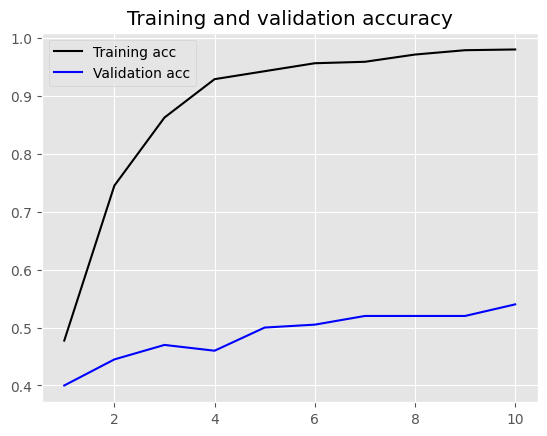

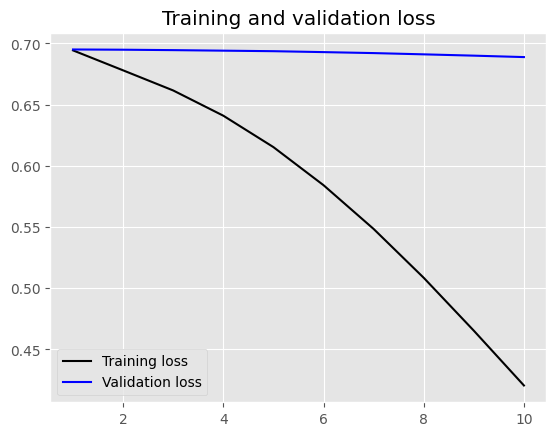

In [111]:
# Displaying the accuracy and loss curves
accuracy3 = history3.history["acc"]
validation_accuracy3 = history3.history["val_acc"]
Train_loss3 = history3.history["loss"]
validation_loss3 = history3.history["val_loss"]

epochs = range(1, len(accuracy3) + 1)

plt.plot(epochs, accuracy3, "Black", label = "Training acc")
plt.plot(epochs, validation_accuracy3, "Blue", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, Train_loss3, "Black", label = "Training loss")
plt.plot(epochs, validation_loss3, "Blue", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [112]:
# Evaluating model on test dataset:
test_loss3, test_accuracy3 = model3.evaluate(x_test, y_test)
print('Test loss:', test_loss3)
print('Test accuracy:', test_accuracy3)

782/782 [==============================] - 2s 2ms/step - loss: 0.6813 - acc: 0.5603
Test loss: 0.6812924742698669
Test accuracy: 0.5602800250053406


-- -- Developing a specialized embedding layer tailored to a dataset with 10000 training samples:

In [113]:
features = 10000 # No. of words considered as features
length = 150 # cutting off the text upto text 150 words

# Loading the data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=features)

# sequence the data
x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)

# Combining the text and labels
texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)


x_train = x_train[:10000]
y_train = y_train[:10000]

# Initializing the model and adding layers
model4 = Sequential()
model4.add(Embedding(10000, 8, input_length=length))
model4.add(Flatten())
model4.add(Dense(1, activation='sigmoid'))

# Compiling the model
model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
# Summarizing the model
model4.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_20 (Embedding)    (None, 150, 8)            80000     
                                                                 
 flatten_18 (Flatten)        (None, 1200)              0         
                                                                 
 dense_28 (Dense)            (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [114]:
# Training the model
history4 = model4.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
250/250 [==============================] - 2s 7ms/step - loss: 0.6858 - acc: 0.5789 - val_loss: 0.6624 - val_acc: 0.6910
Epoch 2/10
250/250 [==============================] - 1s 6ms/step - loss: 0.5701 - acc: 0.7829 - val_loss: 0.4938 - val_acc: 0.8170
Epoch 3/10
250/250 [==============================] - 1s 5ms/step - loss: 0.3960 - acc: 0.8599 - val_loss: 0.3785 - val_acc: 0.8435
Epoch 4/10
250/250 [==============================] - 1s 6ms/step - loss: 0.2973 - acc: 0.8956 - val_loss: 0.3322 - val_acc: 0.8600
Epoch 5/10
250/250 [==============================] - 1s 5ms/step - loss: 0.2387 - acc: 0.9175 - val_loss: 0.3141 - val_acc: 0.8710
Epoch 6/10
250/250 [==============================] - 1s 5ms/step - loss: 0.1979 - acc: 0.9345 - val_loss: 0.3093 - val_acc: 0.8745
Epoch 7/10
250/250 [==============================] - 1s 5ms/step - loss: 0.1652 - acc: 0.9474 - val_loss: 0.3080 - val_acc: 0.8780
Epoch 8/10
250/250 [==============================] - 1s 5ms/step - loss: 0.

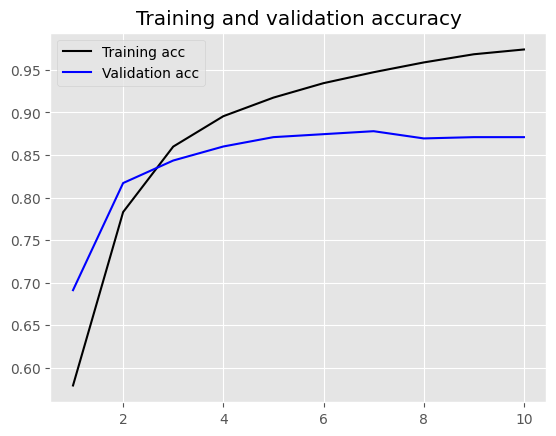

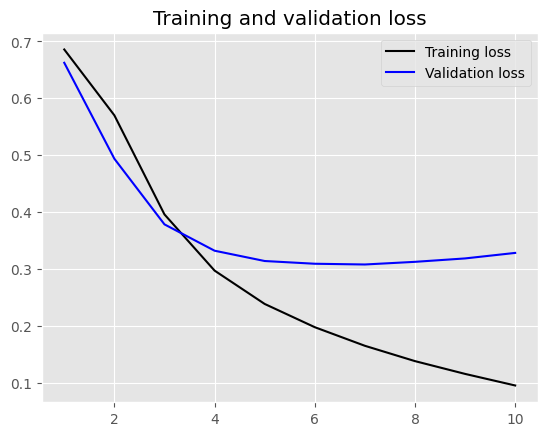

In [115]:
# Displaying accuracy and loss curves:
accuracy4 = history4.history["acc"]
validation_accuracy4 = history4.history["val_acc"]
Train_loss4 = history4.history["loss"]
validation_loss4 = history4.history["val_loss"]

epochs = range(1, len(accuracy4) + 1)

plt.plot(epochs, accuracy4, "Black", label = "Training acc")
plt.plot(epochs, validation_accuracy4, "Blue", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, Train_loss4, "Black", label = "Training loss")
plt.plot(epochs, validation_loss4, "Blue", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [116]:
# Evaluating model on test data:
test_loss4, test_accuracy4 = model4.evaluate(x_test, y_test)
print('Test loss:', test_loss4)
print('Test accuracy:', test_accuracy4)

782/782 [==============================] - 2s 2ms/step - loss: 0.3392 - acc: 0.8554
Test loss: 0.3391733467578888
Test accuracy: 0.855400025844574


In [117]:
# Downloading the data
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz
!rm -r aclImdb/train/unsup

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  3154k      0  0:00:26  0:00:26 --:--:-- 5688k


In [118]:
# Importing libraries
import os
import shutil

# setting up the directory
imdb = 'aclImdb'
training = os.path.join(imdb, 'train')


labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(training, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

-- Breaking down the data into tokens : (Tokenizing)

In [119]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

length2 = 150 # cut off review after 150 words
train_data = 100 # Training sample 100
valid_data = 10000 # Validation sample 10000
words = 10000 # Considering top 10000 words in the dataset

tokenizer1 = Tokenizer(num_words=words)
tokenizer1.fit_on_texts(texts)
sequences = tokenizer1.texts_to_sequences(texts)
word_index = tokenizer1.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length2)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

# Splits data into training and validation set, but shuffles is, since samples are ordered:
# all negatives first, then all positive
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:train_data]
y_train = labels[:train_data]
x_validation = data[train_data:train_data+valid_data]
y_validation = labels[train_data:train_data+valid_data]

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


-- Establishing and configuring GloVe word embedding:

In [120]:
import numpy as np
import requests
from io import BytesIO
import zipfile

glove_url = 'https://nlp.stanford.edu/data/glove.6B.zip'  # URL to download GloVe embeddings
glove_zip = requests.get(glove_url)

# Unzip the contents
with zipfile.ZipFile(BytesIO(glove_zip.content)) as z:
    z.extractall('/content/glove')

# Loading GloVe embeddings into memory
embeddings_index = {}
with open('/content/glove/glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


-- Crafting the GloVe word embeddings matrix:

In [121]:
# pretrained word embedding layer with training sample size = 100
embedding_di = 100

embedding_matrix = np.zeros((words, embedding_di))
for word, i in word_index.items():
    embedd_vector = embeddings_index.get(word)
    if i < words:
        if embedd_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedd_vector

In [122]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(words, embedding_di, input_length=length2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_21 (Embedding)    (None, 150, 100)          1000000   
                                                                 
 flatten_19 (Flatten)        (None, 15000)             0         
                                                                 
 dense_29 (Dense)            (None, 32)                480032    
                                                                 
 dense_30 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [123]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [124]:
# Compiling the model:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

# training the model
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_validation, y_validation))
model.save_weights('Pretrained_glove_model.h5')

Epoch 1/10
4/4 [==============================] - 4s 956ms/step - loss: 4.2519 - acc: 0.4300 - val_loss: 0.6937 - val_acc: 0.5003
Epoch 2/10
4/4 [==============================] - 1s 229ms/step - loss: 0.7232 - acc: 0.6700 - val_loss: 0.7004 - val_acc: 0.5083
Epoch 3/10
4/4 [==============================] - 1s 230ms/step - loss: 0.4552 - acc: 0.8600 - val_loss: 0.9797 - val_acc: 0.5016
Epoch 4/10
4/4 [==============================] - 1s 234ms/step - loss: 0.3850 - acc: 0.7500 - val_loss: 1.0376 - val_acc: 0.5002
Epoch 5/10
4/4 [==============================] - 1s 435ms/step - loss: 0.1785 - acc: 0.9500 - val_loss: 1.6047 - val_acc: 0.5002
Epoch 6/10
4/4 [==============================] - 1s 233ms/step - loss: 0.1484 - acc: 0.9400 - val_loss: 0.7225 - val_acc: 0.5433
Epoch 7/10
4/4 [==============================] - 1s 434ms/step - loss: 0.0590 - acc: 1.0000 - val_loss: 1.3646 - val_acc: 0.5034
Epoch 8/10
4/4 [==============================] - 1s 436ms/step - loss: 0.1788 - acc: 0.94

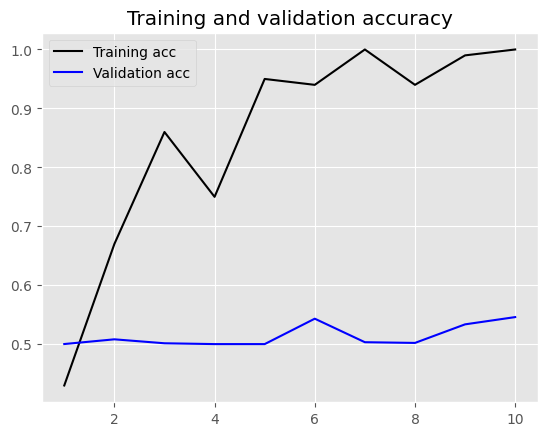

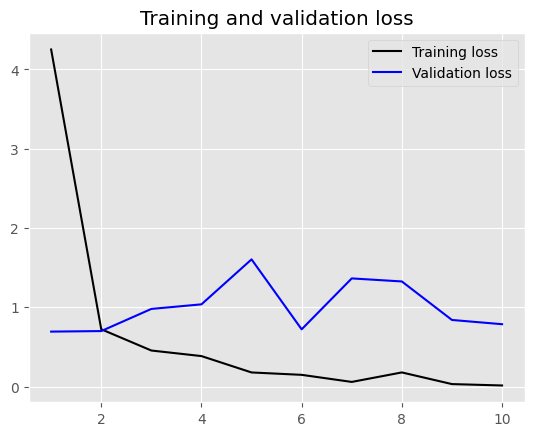

In [125]:
# Displaying the curves:
import matplotlib.pyplot as plt

accuracy = history.history['acc']
valid_accuracy = history.history['val_acc']
train_loss = history.history['loss']
valid_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'Black', label='Training acc')
plt.plot(epochs, valid_accuracy, 'Blue', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss, 'Black', label='Training loss')
plt.plot(epochs, valid_loss, 'Blue', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [126]:
# Evaluating the model on test data
test_loss, test_accuracy= model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

782/782 [==============================] - 2s 2ms/step - loss: 0.8456 - acc: 0.5034
Test loss: 0.8456390500068665
Test accuracy: 0.5034000277519226


-- A word embedding layer pre-trained using a dataset comprising 5000 training samples:

In [127]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

length2 = 150
train_data = 5000
valid_data = 10000
words = 10000

# Tokenizing the data:
tokenizer2 = Tokenizer(num_words=words)
tokenizer2.fit_on_texts(texts)
sequences = tokenizer2.texts_to_sequences(texts)
word_index = tokenizer2.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length2)

labels = np.asarray(labels)
print("Shape of the data tensor:", data.shape)
print("Shape of the label tensor:", labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:train_data]
y_train = labels[:train_data]
x_validation = data[train_data:train_data+valid_data]
y_validation = labels[train_data:train_data+valid_data]
embedding_di = 100

Found 88582 unique tokens.
Shape of the data tensor: (25000, 150)
Shape of the label tensor: (25000,)


In [128]:
#Embedding the word matrix:
embedd_matrix = np.zeros((words, embedding_di))
for word, i in word_index.items():
    embedd_vector = embeddings_index.get(word)
    if i < words:
        if embedd_vector is not None:

            embedd_matrix[i] = embedd_vector

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model11 = Sequential()
model11.add(Embedding(words, embedding_di, input_length=length2))
model11.add(Flatten())
model11.add(Dense(32, activation='relu'))
model11.add(Dense(1, activation='sigmoid'))
model11.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_22 (Embedding)    (None, 150, 100)          1000000   
                                                                 
 flatten_20 (Flatten)        (None, 15000)             0         
                                                                 
 dense_31 (Dense)            (None, 32)                480032    
                                                                 
 dense_32 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [129]:
model11.layers[0].set_weights([embedding_matrix])
model11.layers[0].trainable = False
model11.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

# Training the model
history11 = model11.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_validation, y_validation))
model11.save_weights('pretrained_glove_model.h5')

Epoch 1/10
157/157 [==============================] - 3s 16ms/step - loss: 0.7429 - acc: 0.5012 - val_loss: 0.6932 - val_acc: 0.4985
Epoch 2/10
157/157 [==============================] - 3s 17ms/step - loss: 0.7046 - acc: 0.5074 - val_loss: 0.9382 - val_acc: 0.5018
Epoch 3/10
157/157 [==============================] - 3s 19ms/step - loss: 0.6906 - acc: 0.5314 - val_loss: 0.6990 - val_acc: 0.4977
Epoch 4/10
157/157 [==============================] - 4s 27ms/step - loss: 0.6585 - acc: 0.5882 - val_loss: 0.7683 - val_acc: 0.5039
Epoch 5/10
157/157 [==============================] - 3s 19ms/step - loss: 0.6094 - acc: 0.6440 - val_loss: 0.7389 - val_acc: 0.4958
Epoch 6/10
157/157 [==============================] - 3s 18ms/step - loss: 0.5376 - acc: 0.7164 - val_loss: 0.7755 - val_acc: 0.4988
Epoch 7/10
157/157 [==============================] - 3s 19ms/step - loss: 0.4489 - acc: 0.7820 - val_loss: 0.8807 - val_acc: 0.5007
Epoch 8/10
157/157 [==============================] - 3s 16ms/step - 

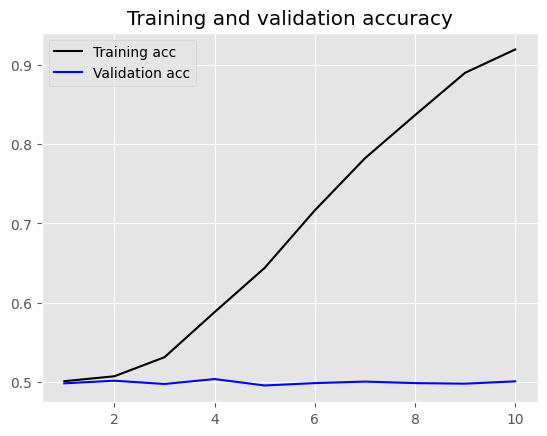

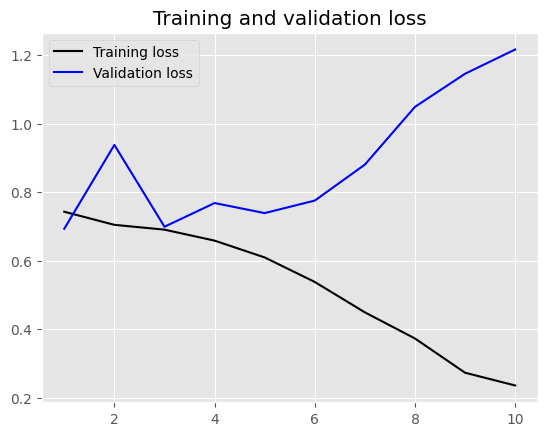

In [130]:
# Displaying the accuracy and loss curves:
import matplotlib.pyplot as plt

accuracy11 = history11.history['acc']
valid_acc11 = history11.history['val_acc']
train_loss11 = history11.history['loss']
valid_loss11 = history11.history['val_loss']

epochs = range(1, len(accuracy11) + 1)

plt.plot(epochs, accuracy11, 'Black', label='Training acc')
plt.plot(epochs, valid_acc11, 'blue', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss11, 'Black', label='Training loss')
plt.plot(epochs, valid_loss11, 'blue', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [131]:
# Evaluating the model on test data
test_loss11, test_accuracy11 = model11.evaluate(x_test, y_test)
print('Test loss:', test_loss11)
print('Test accuracy:', test_accuracy11)

782/782 [==============================] - 4s 4ms/step - loss: 1.2029 - acc: 0.5024
Test loss: 1.2028688192367554
Test accuracy: 0.5023999810218811


-- A word embedding layer pre-trained using a dataset comprising 1000 training samples:

In [132]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

length = 150
train_data = 1000 #Trains on 1000 samples
valid_data = 10000
words = 10000

tokenizer3 = Tokenizer(num_words=words)
tokenizer3.fit_on_texts(texts)
sequences = tokenizer3.texts_to_sequences(texts)
word_index = tokenizer3.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [133]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:train_data]
y_train = labels[:train_data]
x_val = data[train_data:train_data+valid_data]
y_val = labels[train_data:train_data+valid_data]
embedding_dim = 100

embedd_matrix = np.zeros((words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < words:
        if embedding_vector is not None:

            embedd_matrix[i] = embedding_vector

In [134]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model12 = Sequential()
model12.add(Embedding(words, embedding_dim, input_length=length))
model12.add(Flatten())
model12.add(Dense(32, activation='relu'))
model12.add(Dense(1, activation='sigmoid'))
model12.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_23 (Embedding)    (None, 150, 100)          1000000   
                                                                 
 flatten_21 (Flatten)        (None, 15000)             0         
                                                                 
 dense_33 (Dense)            (None, 32)                480032    
                                                                 
 dense_34 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [135]:
# Compiling and training the model
model12.layers[0].set_weights([embedding_matrix])
model12.layers[0].trainable = False
model12.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history12 = model12.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model12.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
32/32 [==============================] - 3s 61ms/step - loss: 1.0344 - acc: 0.5110 - val_loss: 0.6985 - val_acc: 0.4976
Epoch 2/10
32/32 [==============================] - 2s 52ms/step - loss: 0.6231 - acc: 0.6330 - val_loss: 0.7040 - val_acc: 0.5010
Epoch 3/10
32/32 [==============================] - 2s 53ms/step - loss: 0.5486 - acc: 0.7370 - val_loss: 0.7089 - val_acc: 0.5086
Epoch 4/10
32/32 [==============================] - 2s 52ms/step - loss: 0.4368 - acc: 0.8540 - val_loss: 0.8820 - val_acc: 0.5031
Epoch 5/10
32/32 [==============================] - 2s 51ms/step - loss: 0.3825 - acc: 0.8480 - val_loss: 1.3709 - val_acc: 0.5031
Epoch 6/10
32/32 [==============================] - 2s 52ms/step - loss: 0.4668 - acc: 0.7950 - val_loss: 1.0805 - val_acc: 0.5032
Epoch 7/10
32/32 [==============================] - 2s 48ms/step - loss: 0.2327 - acc: 0.9210 - val_loss: 0.9464 - val_acc: 0.5139
Epoch 8/10
32/32 [==============================] - 1s 29ms/step - loss: 0.2234 - a

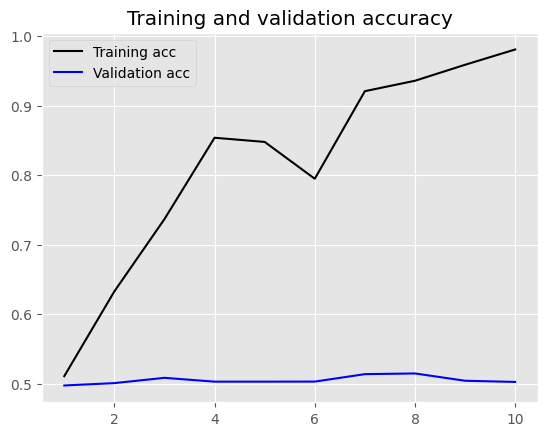

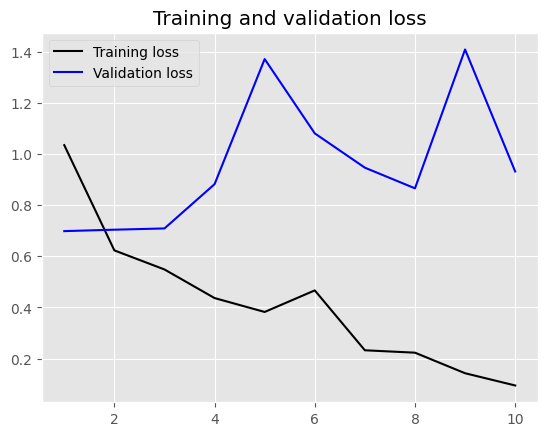

In [136]:
# Displaying the accuracy and loss curves
import matplotlib.pyplot as plt

acc12 = history12.history['acc']
val_acc12 = history12.history['val_acc']
loss12 = history12.history['loss']
val_loss12 = history12.history['val_loss']

epochs = range(1, len(acc12) + 1)

plt.plot(epochs, acc12, 'Black', label='Training acc')
plt.plot(epochs, val_acc12, 'Blue', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss12, 'Black', label='Training loss')
plt.plot(epochs, val_loss12, 'Blue', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [137]:
# Evaluating the model on test dataset
test_loss12, test_accuracy12 = model12.evaluate(x_test, y_test)
print('Test loss:', test_loss12)
print('Test accuracy:', test_accuracy12)

782/782 [==============================] - 3s 4ms/step - loss: 0.9377 - acc: 0.4916
Test loss: 0.9376863241195679
Test accuracy: 0.4915600121021271


-- A word embedding layer pre-trained using a dataset comprising 1000 training samples:

In [138]:
# TOkenization of the data
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

length = 150
train_ds = 10000 # Trains on 10000 samples
valid_ds = 10000
words = 10000

tokenizer4 = Tokenizer(num_words=words)
tokenizer4.fit_on_texts(texts)
sequences = tokenizer4.texts_to_sequences(texts)
word_index = tokenizer4.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [139]:
# Embedding word matrix
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:train_ds]
y_train = labels[:train_ds]
x_val = data[train_ds:train_ds+valid_ds]
y_val = labels[train_ds:train_ds+valid_ds]
embedd_dim = 100

embedd_matrix = np.zeros((words, embedd_dim))
for word, i in word_index.items():
    embedd_vector = embeddings_index.get(word)
    if i < words:
        if embedd_vector is not None:

            embedd_matrix[i] = embedd_vector

In [140]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model13 = Sequential()
model13.add(Embedding(words, embedding_dim, input_length=length))
model13.add(Flatten())
model13.add(Dense(32, activation='relu'))
model13.add(Dense(1, activation='sigmoid'))
model13.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_24 (Embedding)    (None, 150, 100)          1000000   
                                                                 
 flatten_22 (Flatten)        (None, 15000)             0         
                                                                 
 dense_35 (Dense)            (None, 32)                480032    
                                                                 
 dense_36 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [141]:
# Compiling and training the model
model13.layers[0].set_weights([embedding_matrix])
model13.layers[0].trainable = False
model13.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history13 = model13.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model13.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
313/313 [==============================] - 5s 15ms/step - loss: 0.7098 - acc: 0.5007 - val_loss: 0.6931 - val_acc: 0.4971
Epoch 2/10
313/313 [==============================] - 5s 15ms/step - loss: 0.6940 - acc: 0.5283 - val_loss: 0.6934 - val_acc: 0.5041
Epoch 3/10
313/313 [==============================] - 5s 14ms/step - loss: 0.6735 - acc: 0.5889 - val_loss: 0.7277 - val_acc: 0.5047
Epoch 4/10
313/313 [==============================] - 4s 12ms/step - loss: 0.6274 - acc: 0.6670 - val_loss: 0.7173 - val_acc: 0.4930
Epoch 5/10
313/313 [==============================] - 3s 10ms/step - loss: 0.5822 - acc: 0.7078 - val_loss: 0.7357 - val_acc: 0.4936
Epoch 6/10
313/313 [==============================] - 3s 10ms/step - loss: 0.5331 - acc: 0.7405 - val_loss: 1.1434 - val_acc: 0.5034
Epoch 7/10
313/313 [==============================] - 4s 12ms/step - loss: 0.4843 - acc: 0.7738 - val_loss: 1.2309 - val_acc: 0.5031
Epoch 8/10
313/313 [==============================] - 4s 14ms/step - 

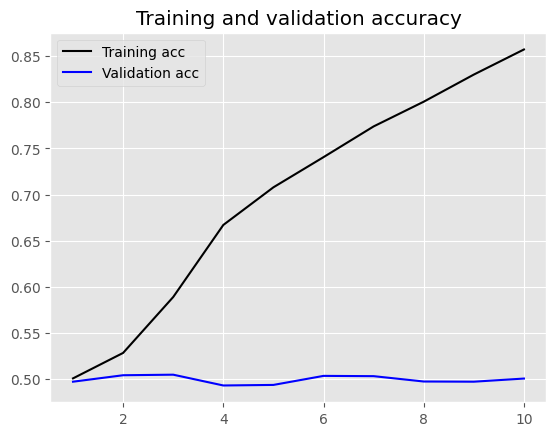

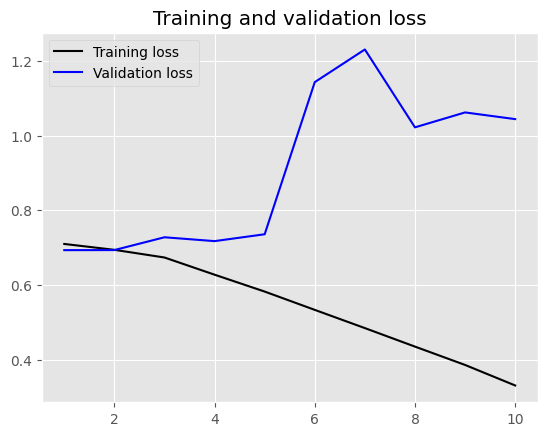

In [142]:
# displaying the accuracy and loss curves
import matplotlib.pyplot as plt

accuracy13 = history13.history['acc']
valid_acc13 = history13.history['val_acc']
loss13 = history13.history['loss']
valid_loss13 = history13.history['val_loss']

epochs = range(1, len(accuracy13) + 1)

plt.plot(epochs, accuracy13, 'Black', label='Training acc')
plt.plot(epochs, valid_acc13, 'Blue', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss13, 'Black', label='Training loss')
plt.plot(epochs, valid_loss13, 'Blue', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [143]:
# Evaluating the model on test dataset
test_loss13, test_accuracy13 = model13.evaluate(x_test, y_test)
print('Test loss:', test_loss13)
print('Test accuracy:', test_accuracy13)

782/782 [==============================] - 3s 4ms/step - loss: 1.0428 - acc: 0.4990
Test loss: 1.0428407192230225
Test accuracy: 0.49904000759124756
